In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mp
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [84]:
le = LabelEncoder()
model = LinearRegression()
logic = LogisticRegression()
scaler = StandardScaler()
dt = DecisionTreeClassifier()

In [61]:
df = pd.read_csv(r"C:\Users\Yagnesh Narola\Documents\Coding Languages\Artificial Intelligence\Excel_and_CSV\accident.csv")

In [62]:
df

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0
...,...,...,...,...,...,...
195,69,Female,111.0,No,Yes,1
196,30,Female,51.0,No,Yes,1
197,58,Male,110.0,No,Yes,1
198,20,Male,103.0,No,Yes,1


In [63]:
df.shape

(200, 6)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


<Axes: ylabel='Speed_of_Impact'>

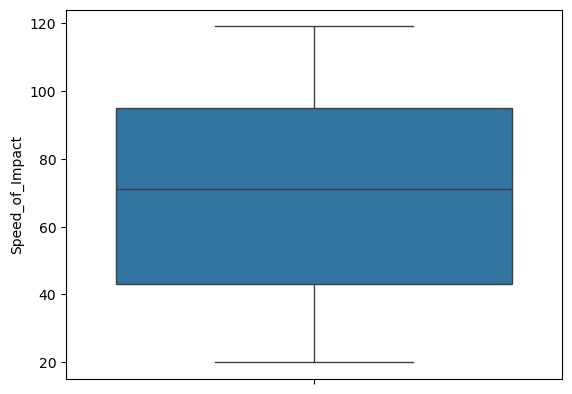

In [65]:
sns.boxplot(df['Speed_of_Impact'])

In [66]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Speed_of_Impact'] = df['Speed_of_Impact'].fillna(df['Speed_of_Impact'].mode()[0])

In [94]:
df2 = df.copy()

In [68]:
dfobj = df.select_dtypes(include = 'object')
for i in df2[dfobj.columns]:
    df2[i] = le.fit_transform(df[i])

In [69]:
df2

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,0,27.0,0,0,1
1,69,0,46.0,0,1,1
2,46,1,46.0,1,1,0
3,32,1,117.0,0,1,0
4,60,0,40.0,1,1,0
...,...,...,...,...,...,...
195,69,0,111.0,0,1,1
196,30,0,51.0,0,1,1
197,58,1,110.0,0,1,1
198,20,1,103.0,0,1,1


In [86]:
x = df2.drop(columns = 'Survived')
y = df2['Survived']

In [87]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 42, test_size = 0.2)

In [88]:
scaler.fit(xtrain)
xtrainscaled = scaler.transform(xtrain)
xtestscaled = scaler.transform(xtest)

In [89]:
model.fit(xtrainscaled,ytrain)
linear = model.score(xtestscaled,ytest)

In [91]:
logic.fit(xtrainscaled,ytrain)
logic.score(xtestscaled,ytest)

0.55

In [92]:
dt.fit(xtrainscaled,ytrain)
dt.score(xtestscaled,ytest)

0.475

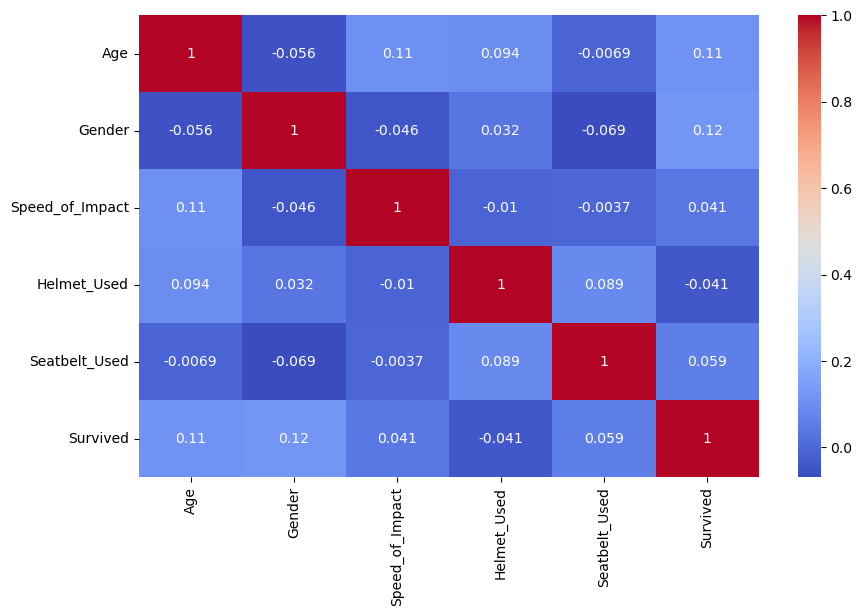

In [93]:
mp.figure(figsize=(10, 6))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
mp.show()